In [ ]:
# ==============================================================================
# DATE: 10-01-2026
# PROJECT: Forecasting the Unemployment Rate in Italy
# MODEL: SARIMA + GRU (Hybrid Model)
# GENERAL DESCRIPTION:
#
# This script implements a hybrid SARIMA-GRU model for quarterly unemployment
# time series disaggregated by groups (age and gender).
# The main idea is:
#   1. Fit a SARIMA model to each series to capture trend and seasonality.
#   2. Compute the residuals of the SARIMA model (prediction errors).
#   3. Train an GRU model on the residuals to learn the remaining nonlinear patterns.
#   4. Combine the SARIMA and GRU forecasts to improve overall prediction performance.
#
# The script performs:
# - Preprocessing and sliding window creation for GRU input.
# - Training of both the SARIMA model and the GRU on the residuals.
# - Model evaluation using MAE, MSE, RMSE, and MAPE metrics, including
#   confidence intervals via bootstrapping.
# - Multi-step forecasting for the next 4 quarters.
# - Storage and visualization of results and forecasts.
#
# OUTPUTS:
# - "unemployment_forecast_metrics_SARIMA_GRU.xlsx": performance metrics.
# - "unemployment_forecast_SARIMA_GRU.xlsx": predictions for upcoming quarters.
# ==============================================================================

#Import the file

import pandas as pd
import matplotlib.pyplot as plt
disocupati_trimestral = pd.read_csv('C:/Users/2davi/OneDrive/Desktop/Trabajo/Tesis/Tesis/Disocupati_II.csv', 
                       index_col='Period', 
                       parse_dates=True)
print(disocupati_trimestral)

             15-34 M    15-34 F   35-49 M   35-49 F   50-74 M   50-74 F  \
Period                                                                    
2004-Q1    11.720628  17.198032  4.283283  8.776062  4.004764  5.376203   
2004-Q2    11.410664  16.187372  3.654493  7.196378  3.636536  4.515018   
2004-Q3    10.041510  15.682014  3.520125  6.945425  3.394804  3.976243   
2004-Q4    11.918557  17.227696  4.020448  7.582207  3.604743  3.583677   
2005-Q1    12.334781  16.852636  4.316241  7.577546  3.440298  4.204936   
...              ...        ...       ...       ...       ...       ...   
2024-Q1    12.365911  14.369536  5.682832  8.537508  4.504719  5.837779   
2024-Q2    10.868221  13.000800  4.814713  7.091986  4.057952  4.814553   
2024-Q3    10.391842  10.590439  4.218075  5.802678  3.030988  3.656154   
2024-Q4    10.925559  12.400330  4.410602  6.221986  3.202396  4.001726   
2025-Q1    11.640231  13.868486  4.948448  7.037018  4.070563  4.589607   

           Global_Rate  

C:\Users\2davi\AppData\Local\Temp\ipykernel_10636\2043843392.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  disocupati_trimestral = pd.read_csv('C:/Users/2davi/OneDrive/Desktop/Trabajo/Tesis/Tesis/Disocupati_II.csv',



=== SARIMA + GRU on column: 15-34 M ===
MAE=0.761  MSE=1.088  RMSE=1.043  MAPE=5.64%
    95% CI MAE : [0.455, 1.141]
    95% CI MSE : [0.323, 2.149]
    95% CI RMSE: [0.568, 1.466]
    95% CI MAPE: [3.57, 8.20]


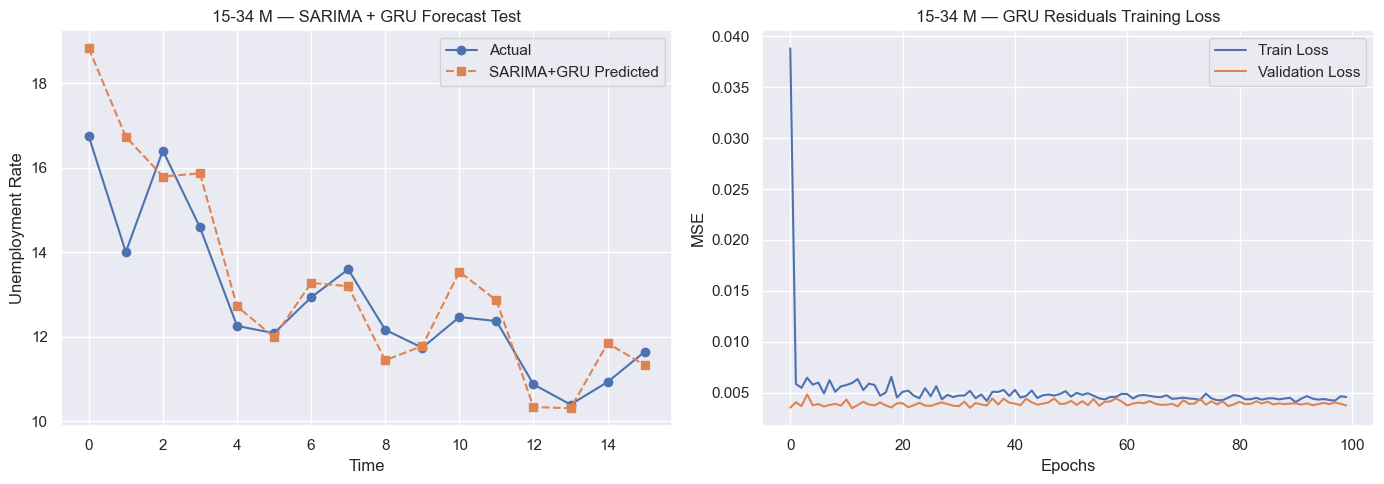


=== SARIMA + GRU on column: 15-34 F ===
MAE=1.006  MSE=1.921  RMSE=1.386  MAPE=6.83%
    95% CI MAE : [0.579, 1.497]
    95% CI MSE : [0.637, 3.784]
    95% CI RMSE: [0.798, 1.945]
    95% CI MAPE: [3.76, 10.42]


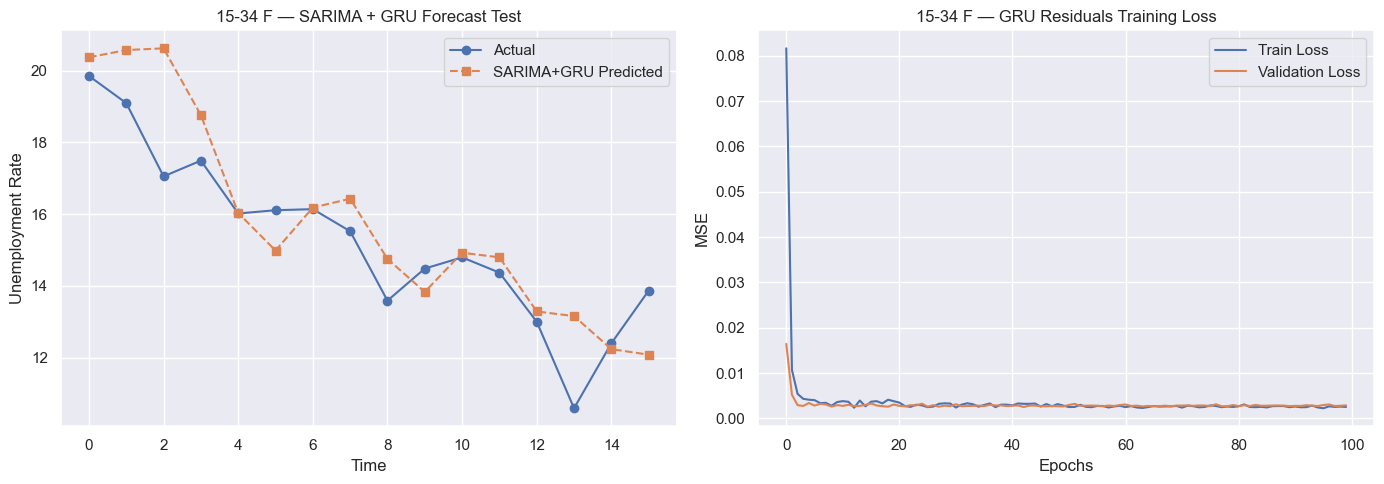


=== SARIMA + GRU on column: 35-49 M ===
MAE=0.338  MSE=0.167  RMSE=0.408  MAPE=6.08%
    95% CI MAE : [0.231, 0.450]
    95% CI MSE : [0.069, 0.274]
    95% CI RMSE: [0.263, 0.524]
    95% CI MAPE: [4.26, 7.84]


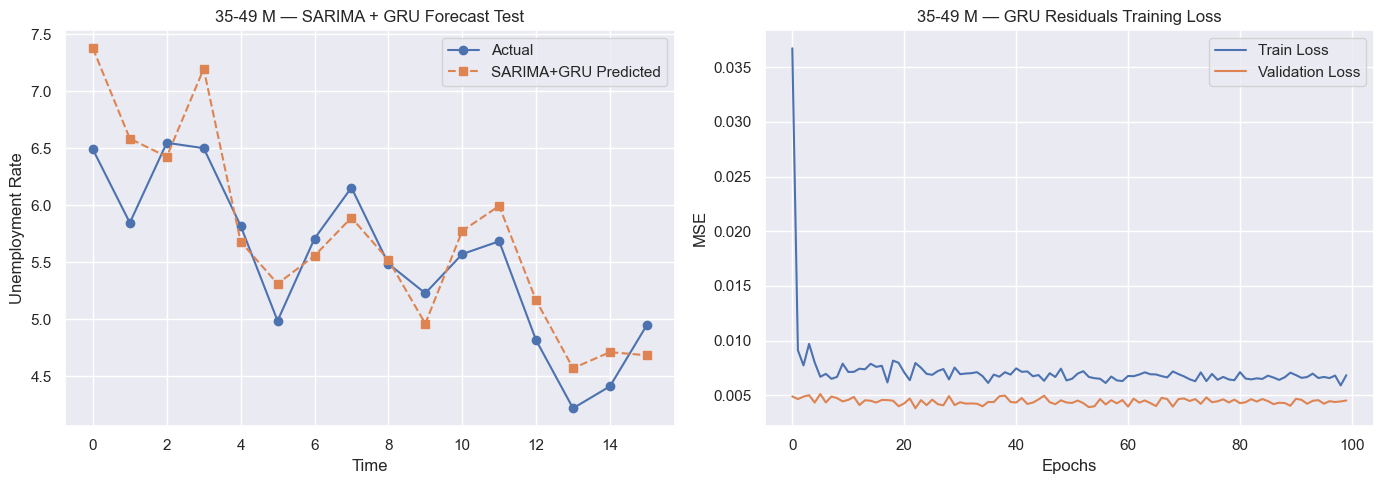


=== SARIMA + GRU on column: 35-49 F ===
MAE=0.608  MSE=0.561  RMSE=0.749  MAPE=7.99%
    95% CI MAE : [0.418, 0.850]
    95% CI MSE : [0.274, 0.997]
    95% CI RMSE: [0.523, 0.998]
    95% CI MAPE: [5.14, 12.06]


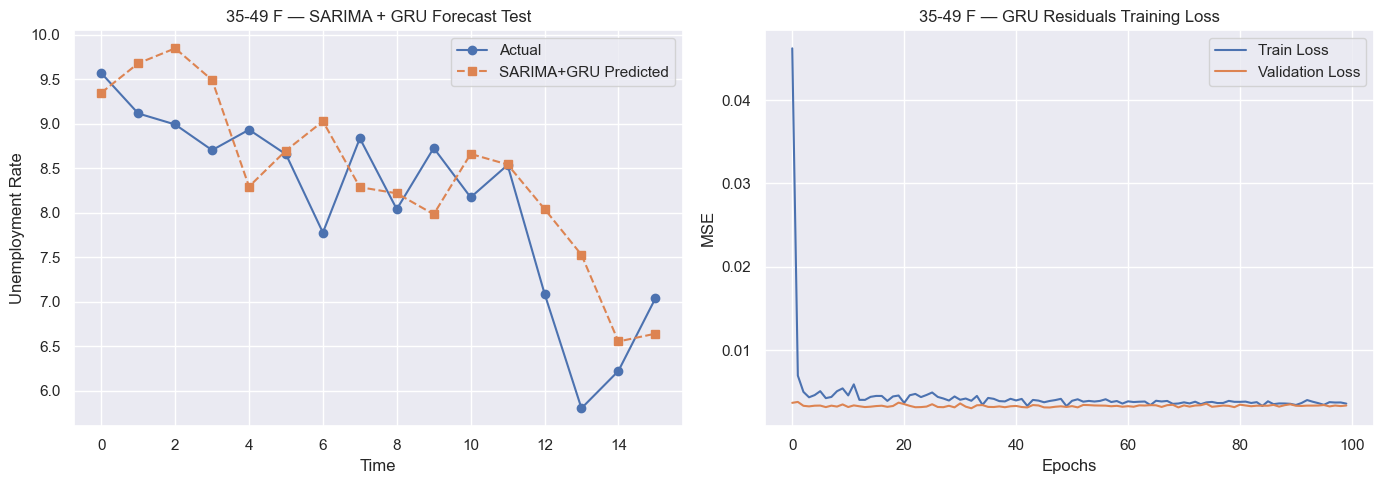


=== SARIMA + GRU on column: 50-74 M ===
MAE=0.278  MSE=0.128  RMSE=0.357  MAPE=6.77%
    95% CI MAE : [0.169, 0.396]
    95% CI MSE : [0.056, 0.214]
    95% CI RMSE: [0.237, 0.463]
    95% CI MAPE: [3.96, 9.87]


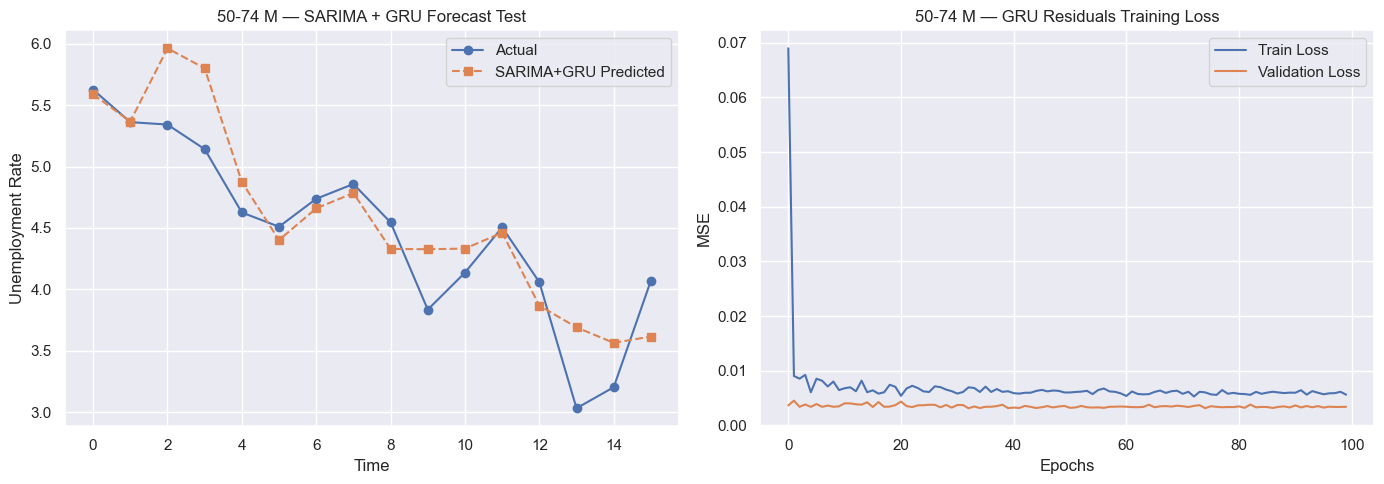


=== SARIMA + GRU on column: 50-74 F ===
MAE=0.468  MSE=0.360  RMSE=0.600  MAPE=9.85%
    95% CI MAE : [0.293, 0.660]
    95% CI MSE : [0.157, 0.618]
    95% CI RMSE: [0.396, 0.786]
    95% CI MAPE: [5.49, 14.79]


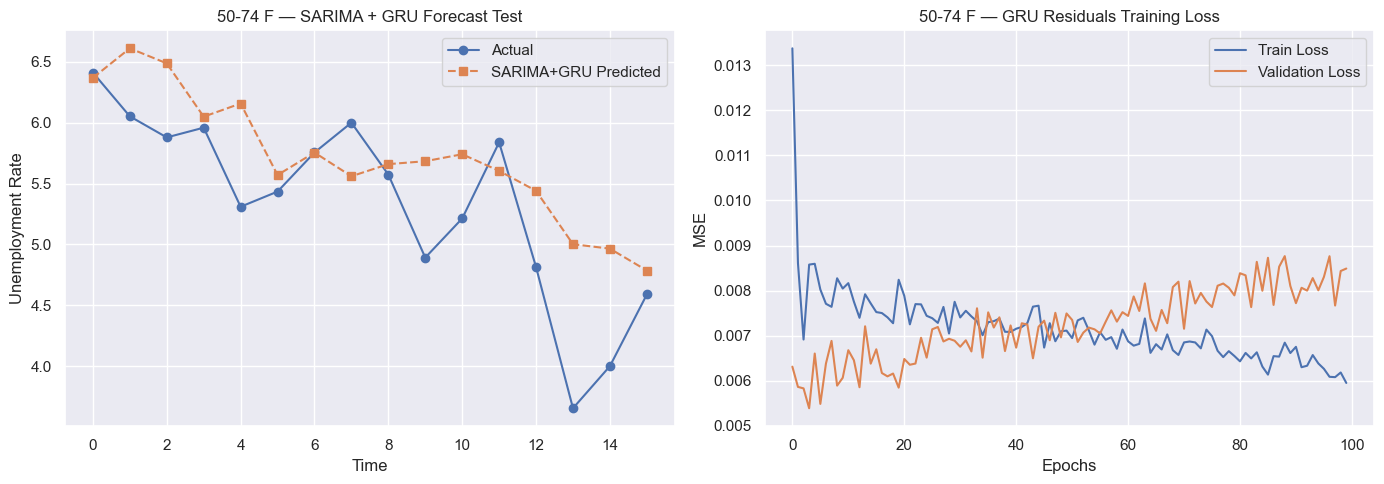


=== SARIMA + GRU on column: Global_Rate ===
MAE=0.370  MSE=0.213  RMSE=0.461  MAPE=4.91%
    95% CI MAE : [0.241, 0.515]
    95% CI MSE : [0.100, 0.349]
    95% CI RMSE: [0.316, 0.590]
    95% CI MAPE: [3.12, 7.08]


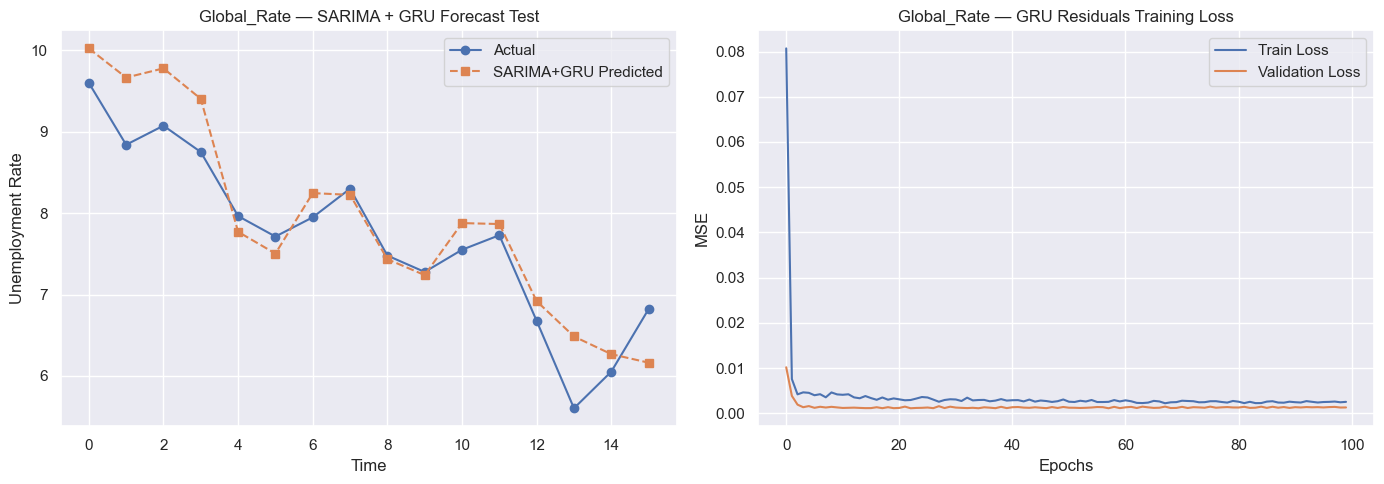

                  MAE   MAE_low  MAE_high       MSE   MSE_low  MSE_high  \
column                                                                    
15-34 M      0.760989  0.454843  1.140730  1.088344  0.323104  2.148796   
15-34 F      1.005530  0.579040  1.496608  1.920972  0.637387  3.783897   
35-49 M      0.337623  0.231104  0.450279  0.166548  0.069340  0.274350   
35-49 F      0.608280  0.418087  0.850360  0.560725  0.273676  0.996818   
50-74 M      0.277930  0.169432  0.396201  0.127770  0.056167  0.214097   
50-74 F      0.468233  0.292908  0.660200  0.359747  0.156549  0.618473   
Global_Rate  0.370444  0.240570  0.514855  0.212725  0.100062  0.348597   

                 RMSE  RMSE_low  RMSE_high      MAPE  MAPE_low  MAPE_high  
column                                                                     
15-34 M      1.043237  0.568422   1.465877  5.640939  3.566314   8.200847  
15-34 F      1.385991  0.798360   1.945224  6.825177  3.757967  10.419516  
35-49 M      0.40810

In [2]:
# ==============================================================================
# GRU CONFIGURATIONS (Hybrid SARIMA + GRU Models)
# Format: SARIMA_GRU_<ID> → SARIMA(p,d,q)(P,D,Q)[s] + GRU architecture
#
# GRU architecture notation:
#   - G: GRU layer size(s)
#   - D: Dense layer size(s)
#   - Dropout: Regularization dropout rate(s)
#   - LR: Learning rate
#   - WS: Window size
#   - Epochs: Number of training epochs
# ==============================================================================

# SARIMA_GRU_UrA → SARIMA(2,1,3)(1,0,0)[4] + GRU(G128/G64/D32/D1), 2 Dropouts (0.50), LR=0.001, WS=6, Epochs=200
# SARIMA_GRU_UrB → SARIMA(0,1,0)(1,0,1)[4] + GRU(G100/D25/D1),  Dropout (0.25), LR=0.01, WS=6, Epochs=200
# SARIMA_GRU_UrC → SARIMA(0,1,1)(1,0,1)[4] + GRU(G48/D24/D1), Dropout=0.25, LR=0.001, WS=6, Epochs=100
# SARIMA_GRU_UrD → SARIMA(2,1,2)(0,0,1)[4] + GRU(G100/D25/D1), Dropout=0.50, LR=0.01, WS=6, Epochs=100
# SARIMA_GRU_UrE → SARIMA(2,1,1)(1,0,1)[4] + GRU(G48/D24/D1), Dropout=0.25, LR=0.001, WS=6, Epochs=100
# SARIMA_GRU_UrF → SARIMA(0,1,3)(1,0,2)[4] + GRU(G48/D24/D1), Dropout=0.25, LR=0.001, WS=6, Epochs=100
# SARIMA_GRU_UrG → ARIMA(2,1,2) + GRU(G128/G64/D32/D1), 2 Dropouts (0.50), LR=0.01, WS=6, Epochs=100

import os
import random
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, GRU
from tensorflow.keras.optimizers import Nadam

from statsmodels.tsa.statespace.sarimax import SARIMAX  # CHANGED: use SARIMA

# ------------------ SETUP ------------------

# Fix seed for reproducibility
SEED = 12345
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Ignore warnings to clean output
warnings.filterwarnings("ignore")

# Apply seaborn theme
sns.set_theme(style="darkgrid")  # NEW: darkgrid theme

# ------------------ HELPER FUNCTIONS ------------------

def create_sequences(data, window_size):
    """
    This function transforms a 1D time series into sliding windows of sequences
    suitable for LSTM model input. The idea is to convert the series into (X, y) pairs where:

    - X is a sequence of length 'window_size' from the time series.
    - y is the value immediately following that sequence.

    Example: if window_size = 3 and data = [10, 20, 30, 40, 50],
    then the result will be:
        X = [[10, 20, 30], [20, 30, 40]]
        y = [40, 50]

    Returns:
        - X: input array of shape (n_samples, window_size, 1)
        - y: target array with future values.
    """
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    X = np.array(X).reshape(-1, window_size, 1)
    y = np.array(y)
    return X, y


def bootstrap_ci(y_true, y_pred, metric_func, n_bootstrap=1000, ci=0.95):
    """
    This function estimates a confidence interval (CI) for a chosen evaluation metric 
    (e.g., MAE, MSE, RMSE, or MAPE) using the *bootstrap* resampling technique.

    How it works:
    - Random samples (with replacement) are repeatedly drawn from the prediction errors.
    - The specified metric is calculated for each resampled set.
    - The resulting metric values are sorted and the lower and upper percentiles
      are extracted based on the desired confidence level (default is 95%).

    Parameters:
        - y_true: actual values.
        - y_pred: model predictions.
        - metric_func: error metric function (e.g., mean_absolute_error).
        - n_bootstrap: number of bootstrap iterations.
        - ci: confidence level (default 0.95 = 95%).

    Returns:
        - Lower and upper bounds of the confidence interval for the given metric.
    """
    rng = np.random.default_rng(SEED)
    stats = []
    n = len(y_true)
    for _ in range(n_bootstrap):
        idxs = rng.choice(n, n, replace=True)
        sample_true = y_true[idxs]
        sample_pred = y_pred[idxs]
        stat = metric_func(sample_true, sample_pred)
        stats.append(stat)
    lower = np.percentile(stats, (1 - ci) / 2 * 100)
    upper = np.percentile(stats, (1 + ci) / 2 * 100)
    return lower, upper

# ------------------ PARAMETERS ------------------

sarima_order = (0, 1, 3)       # SARIMA non-seasonal order (p,d,q)
seasonal_order = (1, 0, 2, 4)  # SARIMA seasonal order (P,D,Q,s) for quarterly data
window_size = 6                # GRU input window size
test_ratio = 0.20              # Train-test split ratio
epochs = 100                   # Number of epochs for GRU training
batch_size = 4                 # Batch size for GRU training
learning_rt = 0.001             # Learning rate for optimizer
steps_ahead = 4                # Number of future steps to forecast
forecast_quarters = ["2025-Q2", "2025-Q3", "2025-Q4", "2026-Q1"]  # Forecast horizon labels

# ------------------ DATASET ------------------

# Assume 'df' is your  DataFrame with columns as different series
# Each column is a time series you want to forecast

# Also define your forecast index for future periods, e.g.:
# forecast_quarters = pd.date_range(start='2025-01-01', periods=steps_ahead, freq='Q')

# ------------------ STORAGE FOR RESULTS ------------------

all_metrics_sarima_gru = []
all_forecasts_sarima_gru = {}

df = disocupati_trimestral  # make sure this variable is defined with your data

# ------------------ MAIN LOOP ------------------

for col in df.columns:
    print(f"\n=== SARIMA + GRU on column: {col} ===")

    # Original series as float32
    series = df[col].astype("float32")

    # 1) Fit SARIMA model to the series
    sarima_model = SARIMAX(series, order=sarima_order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    sarima_fit = sarima_model.fit(disp=False)

    # 2) Calculate residuals (errors)
    sarima_pred = sarima_fit.fittedvalues
    residuals = series - sarima_pred

    # Drop NA residuals if any (can appear after differencing)
    residuals = residuals.dropna()

    # 3) Scale residuals for GRU (range 0-1)
    scaler_res = MinMaxScaler(feature_range=(0, 1))
    residuals_scaled = scaler_res.fit_transform(residuals.values.reshape(-1, 1)).flatten()

    # 4) Create sequences for GRU training from residuals
    X_res, y_res = create_sequences(residuals_scaled, window_size)

    # Split residual data into train and test sets
    split_idx_res = int(len(X_res) * (1 - test_ratio))
    X_train_res, X_test_res = X_res[:split_idx_res], X_res[split_idx_res:]
    y_train_res, y_test_res = y_res[:split_idx_res], y_res[split_idx_res:]

    # 5) Define and compile GRU model on residuals
    model_res = Sequential(
        [
            GRU(48, activation="tanh", return_sequences=False, input_shape=(window_size, 1)),
            Dropout(0.25),
            #GRU(64, activation="tanh", return_sequences=False),
            #Dropout(0.5),
            Dense(24, activation="relu"),
            Dense(1),
        ]
    )
    model_res.compile(optimizer=Nadam(learning_rate=learning_rt), loss="mse")

    # Train GRU model
    history_res = model_res.fit(
        X_train_res,
        y_train_res,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test_res, y_test_res),
        verbose=0,
    )

    # 6) Predict residuals on test set and invert scaling
    y_pred_res = model_res.predict(X_test_res, verbose=0)
    y_test_res_inv = scaler_res.inverse_transform(y_test_res.reshape(-1, 1))
    y_pred_res_inv = scaler_res.inverse_transform(y_pred_res)

    # 7) Final test prediction = SARIMA fitted values + GRU residuals predictions
    sarima_pred_test = sarima_pred[-len(y_test_res) :]
    final_pred_test = sarima_pred_test.values + y_pred_res_inv.flatten()

    # 8) Calculate error metrics with bootstrap confidence intervals
    y_true_test = series[-len(y_test_res) :].values

    mae = mean_absolute_error(y_true_test, final_pred_test)
    mse = mean_squared_error(y_true_test, final_pred_test)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true_test - final_pred_test) / y_true_test)) * 100

    mae_ci = bootstrap_ci(y_true_test, final_pred_test, mean_absolute_error)
    mse_ci = bootstrap_ci(y_true_test, final_pred_test, mean_squared_error)
    rmse_ci = bootstrap_ci(y_true_test, final_pred_test, lambda a, b: np.sqrt(mean_squared_error(a, b)))
    mape_ci = bootstrap_ci(y_true_test, final_pred_test, lambda a, b: np.mean(np.abs((a - b) / a)) * 100)

    print(f"MAE={mae:.3f}  MSE={mse:.3f}  RMSE={rmse:.3f}  MAPE={mape:.2f}%")
    print(f"    95% CI MAE : [{mae_ci[0]:.3f}, {mae_ci[1]:.3f}]")
    print(f"    95% CI MSE : [{mse_ci[0]:.3f}, {mse_ci[1]:.3f}]")
    print(f"    95% CI RMSE: [{rmse_ci[0]:.3f}, {rmse_ci[1]:.3f}]")
    print(f"    95% CI MAPE: [{mape_ci[0]:.2f}, {mape_ci[1]:.2f}]")

    # Store metrics
    all_metrics_sarima_gru.append(
        {
            "column": col,
            "MAE": mae,
            "MAE_low": mae_ci[0],
            "MAE_high": mae_ci[1],
            "MSE": mse,
            "MSE_low": mse_ci[0],
            "MSE_high": mse_ci[1],
            "RMSE": rmse,
            "RMSE_low": rmse_ci[0],
            "RMSE_high": rmse_ci[1],
            "MAPE": mape,
            "MAPE_low": mape_ci[0],
            "MAPE_high": mape_ci[1],
        }
    )

    # 9) Multi-step ahead forecasting combining SARIMA + GRU residuals

    # Predict future steps with SARIMA
    future_sarima_pred = sarima_fit.forecast(steps=steps_ahead)

    # Predict future residuals iteratively with GRU
    last_window_res = X_test_res[-1].flatten()
    future_residuals_scaled = []
    input_seq_res = last_window_res.copy()

    for _ in range(steps_ahead):
        input_reshaped = input_seq_res.reshape(1, window_size, 1)
        pred_res = model_res.predict(input_reshaped, verbose=0)[0, 0]
        future_residuals_scaled.append(pred_res)
        input_seq_res = np.roll(input_seq_res, -1)
        input_seq_res[-1] = pred_res

    future_residuals = scaler_res.inverse_transform(np.array(future_residuals_scaled).reshape(-1, 1)).flatten()

    # Combine final multi-step forecast
    final_future_pred = future_sarima_pred.values + future_residuals

    all_forecasts_sarima_gru[col] = final_future_pred

    # 10) Plot results

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Left: Test set - actual vs predicted
    axs[0].plot(y_true_test, label="Actual", marker="o")
    axs[0].plot(final_pred_test, label="SARIMA+GRU Predicted", marker="s", linestyle="--")
    axs[0].set_title(f"{col} — SARIMA + GRU Forecast Test")
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("Unemployment Rate")
    axs[0].legend()
    axs[0].grid(True)

    # Right: GRU training loss
    axs[1].plot(history_res.history["loss"], label="Train Loss")
    axs[1].plot(history_res.history["val_loss"], label="Validation Loss")
    axs[1].set_title(f"{col} — GRU Residuals Training Loss")
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("MSE")
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# ------------------ SAVE RESULTS ------------------

metrics_sarima_gru_df = pd.DataFrame(all_metrics_sarima_gru).set_index("column")
metrics_sarima_gru_df.to_excel("unemployment_forecast_metrics_SARIMA_GRU.xlsx")
print(metrics_sarima_gru_df)

forecast_sarima_gru_df = pd.DataFrame(all_forecasts_sarima_gru, index=forecast_quarters)
forecast_sarima_gru_df.to_excel("unemployment_forecast_SARIMA_GRU.xlsx")
print(forecast_sarima_gru_df)
